In [32]:
import sklearn
# import sklearn_pandas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# from sklearn_pandas import DataFrameMapper

In [33]:
dtype = {'label':object, 'weekday':object, 'clickTime':object, 'creativeID':object, 'positionID':object, 'connectionType':object,
       'telecomsOperator':object, 'age':object, 'gender':object, 'education':object, 'marriageStatus':object,
       'haveBaby':object, 'hometown':object, 'residence':object, 'sitesetID':object, 'positionType':object,
       'adID':object, 'camgaignID':object, 'advertiserID':object, 'appID':object, 'appPlatform':object,
       'appCategory':object}
# train = pd.read_csv('../../data/train.csv', nrows=1000, dtype=dtype)
train = pd.read_csv('../../data_ori/train.csv', dtype=dtype)

In [34]:
train.tail()

,label,clickTime,conversionTime,creativeID,userID,positionID,connectionType,telecomsOperator
3749523,0,302359,NaN,5030,837304,2150,1,1
3749524,0,302359,NaN,4469,1037576,1456,1,3
3749525,0,302359,NaN,3869,1163462,6315,1,1
3749526,0,302359,NaN,3586,89477,7149,1,1
3749527,0,302359,NaN,6311,93736,1463,1,1


In [35]:
len(train)

3749528

In [36]:
train.columns

Index(['label', 'clickTime', 'conversionTime', 'creativeID', 'userID',
       'positionID', 'connectionType', 'telecomsOperator'],
      dtype='object')

In [37]:
# train.count()

In [38]:
# train.dtypes

In [39]:
def time_transform(series):
    return str(series)[2:4]
train['clickTime'] = train['clickTime'].apply(time_transform)

In [40]:
# 统计分类变量信息
train.describe(include=['object'])

,label,clickTime,creativeID,positionID,connectionType,telecomsOperator
count,3749528,3749528,3749528,3749528,3749528,3749528
unique,2,24,6315,7219,5,4
top,0,20,4565,2579,1,1
freq,3656266,253981,449187,384870,3002059,2080156


In [41]:
# 统计数值变量信息
# train.describe(include=['number'])
train.groupby(['label', 'userID']).sum()

conversionTime
label userID                 
0     1                   NaN
      2                   NaN
      4                   NaN
      5                   NaN
      6                   NaN
      7                   NaN
      8                   NaN
      9                   NaN
      10                  NaN
      11                  NaN
      13                  NaN
      14                  NaN
      15                  NaN
      16                  NaN
      17                  NaN
      19                  NaN
      20                  NaN
      21                  NaN
      23                  NaN
      24                  NaN
      25                  NaN
      26                  NaN
      27                  NaN
      28                  NaN
      29                  NaN
      30                  NaN
      32                  NaN
      33                  NaN
      34                  NaN
      35                  NaN
...                       ...
1     2804124        241911.0
      2804142        291134.0
      2804160        301736.0
      2804172        270600.0
      2804194        251443.0
      2804238        262307.0
      2804372        211025.0
      2804398        250143.0
      2804460        190643.0
      2804467        220751.0
      2804592        211118.0
      2804627        291201.0
      2804666        210149.0
      2804702        221718.0
      2804733        282125.0
      2804745        211002.0
      2804862        271026.0
      2804870        201603.0
      2804872        222151.0
      2804905        281237.0
      2804908        180655.0
      2804910        301710.0
      2804929        301111.0
      2804987        251135.0
      2805023        181028.0
      2805068        292153.0
      2805076        231031.0
      2805079        192055.0
      2805110        241320.0
      2805112        231802.0

[2622926 rows x 1 columns]

In [27]:
train.drop('userID', axis=1, inplace=True)

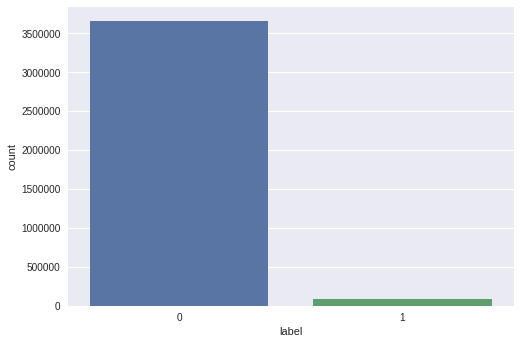

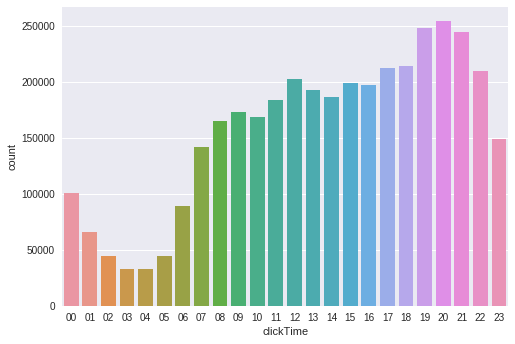

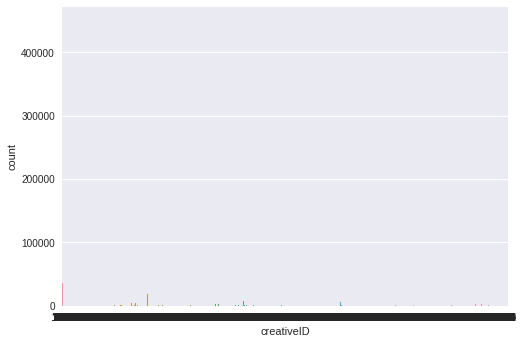

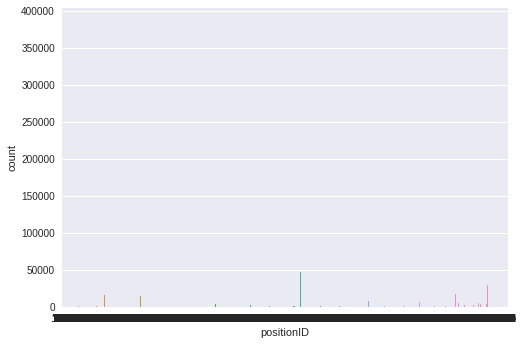

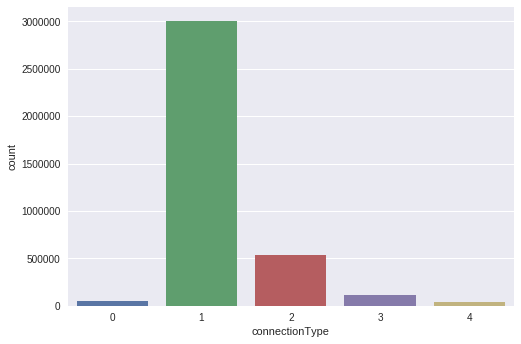

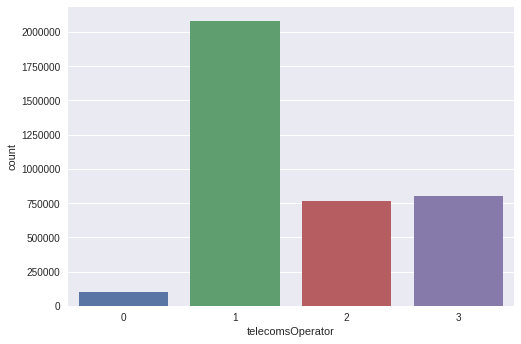

In [28]:
# 画图查看分类变量的分布

categorical_feature = train.dtypes[train.dtypes == 'object'].index
for feature in categorical_feature:
    sns.countplot(x=train[feature], data=train)
    plt.show()

In [29]:
train.groupby(['label', 'userID']).sum()

KeyError: 'userID'